# Dar Alarkan's Financial Analysis

This notebook performs a comprehensive financial analysis of Dar Alarkan Saudi company data, including growth analysis, profitability ratios, financial position metrics, and visualizations.

## Importing Libraries

In [1]:
# Import necessary libraries for data manipulation, analysis, and visualization
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Data Loading and Exploration

In [2]:
# Load the Dar Al Arkan raw data from the CSV file
dar_alarkan_raw_data = pd.read_csv('dar_alarkan_data.csv')

# Display the first few rows to understand the data structure
dar_alarkan_raw_data.head()

,Year,Company_Name,Sector,Revenue_SAR,Net_Income_SAR,Operating_Income_SAR,Total_Assets_SAR,Total_Liabilities_SAR
0,2019,Dar Alarkan,Real Estate Development,3491856,304590,649653,28049229,9039741
1,2020,Dar Alarkan,Real Estate Development,1944854,18794,503318,30934616,11908436
2,2021,Dar Alarkan,Real Estate Development,2493078,132520,684783,31961680,12802050
3,2022,Dar Alarkan,Real Estate Development,3925499,441720,1099653,33512853,13908725
4,2023,Dar Alarkan,Real Estate Development,2707100,610758,865310,33655304,13363423


In [3]:
# Get a summary of the dataset including data types and non-null counts
dar_alarkan_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Year                   6 non-null      int64 
 1   Company_Name           6 non-null      object
 2   Sector                 6 non-null      object
 3   Revenue_SAR            6 non-null      int64 
 4   Net_Income_SAR         6 non-null      int64 
 5   Operating_Income_SAR   6 non-null      int64 
 6   Total_Assets_SAR       6 non-null      int64 
 7   Total_Liabilities_SAR  6 non-null      int64 
dtypes: int64(6), object(2)
memory usage: 516.0+ bytes


## Data Preparation

Note: Gross Profit was excluded from the analysis due to the absence of a clearly disclosed cost of revenue structure in Dar Alarkan’s financial statements.

In [4]:
# Sort the data by year to ensure chronological order
dar_alarkan_raw_data = dar_alarkan_raw_data.sort_values(by='Year').reset_index(drop=True)

# Define the numeric columns that need to be converted
numeric_cols = ['Revenue_SAR', 'Net_Income_SAR','Operating_Income_SAR','Total_Assets_SAR', 'Total_Liabilities_SAR']

# Convert the specified columns to numeric type, coercing errors to NaN
dar_alarkan_raw_data[numeric_cols] = dar_alarkan_raw_data[numeric_cols].apply(pd.to_numeric, errors='coerce').astype(float)

# Display the prepared data
dar_alarkan_raw_data

,Year,Company_Name,Sector,Revenue_SAR,Net_Income_SAR,Operating_Income_SAR,Total_Assets_SAR,Total_Liabilities_SAR
0,2019,Dar Alarkan,Real Estate Development,3491856.0,304590.0,649653.0,28049229.0,9039741.0
1,2020,Dar Alarkan,Real Estate Development,1944854.0,18794.0,503318.0,30934616.0,11908436.0
2,2021,Dar Alarkan,Real Estate Development,2493078.0,132520.0,684783.0,31961680.0,12802050.0
3,2022,Dar Alarkan,Real Estate Development,3925499.0,441720.0,1099653.0,33512853.0,13908725.0
4,2023,Dar Alarkan,Real Estate Development,2707100.0,610758.0,865310.0,33655304.0,13363423.0
5,2024,Dar Alarkan,Real Estate Development,3759022.0,806840.0,1334107.0,36940222.0,15839508.0


In [5]:
# Create a copy of the raw data for analysis to avoid modifying the original
dar_alarkan_new_data = dar_alarkan_raw_data.copy()

## Growth Analysis

In [6]:
# Calculate Year-over-Year Growth for Revenue
dar_alarkan_new_data['Revenue_Growth_%'] = dar_alarkan_new_data['Revenue_SAR'].pct_change() * 100

# Define a function to calculate Compound Annual Growth Rate (CAGR)
def calculate_cagr(start_value, end_value, periods):
    return ((end_value / start_value) ** (1 / periods) - 1) * 100

# Calculate and display the CAGR for Revenue
cagr_revenue = calculate_cagr(dar_alarkan_new_data['Revenue_SAR'].iloc[0], dar_alarkan_new_data['Revenue_SAR'].iloc[-1], len(dar_alarkan_new_data)-1)
print(f"Revenue CAGR: {cagr_revenue:.2f}%")

Revenue CAGR: 1.49%


## Profitability Ratios

In [7]:
# Calculate Operating Margin as a percentage
dar_alarkan_new_data['Operating_Margin_%'] = (dar_alarkan_new_data['Operating_Income_SAR'] / dar_alarkan_new_data['Revenue_SAR']) * 100

# Calculate Net Profit Margin as a percentage
dar_alarkan_new_data['Net_Profit_Margin_%'] = (dar_alarkan_new_data['Net_Income_SAR'] / dar_alarkan_new_data['Revenue_SAR']) * 100

# Display the profitability ratios
print(dar_alarkan_new_data[['Year', 'Operating_Margin_%', 'Net_Profit_Margin_%']])

   Year  Operating_Margin_%  Net_Profit_Margin_%
0  2019           18.604805             8.722868
1  2020           25.879475             0.966345
2  2021           27.467372             5.315518
3  2022           28.013076            11.252582
4  2023           31.964464            22.561339
5  2024           35.490801            21.464094


## Financial Position

In [8]:
# Calculate Leverage Ratio: Liabilities to Assets as a percentage
dar_alarkan_new_data['Liabilities_to_Assets_Ratio'] = (dar_alarkan_new_data['Total_Liabilities_SAR'] / dar_alarkan_new_data['Total_Assets_SAR']) * 100

# Calculate Asset Turnover Ratio
dar_alarkan_new_data['Asset_Turnover_Ratio'] = dar_alarkan_new_data['Revenue_SAR'] / dar_alarkan_new_data['Total_Assets_SAR']

# Display the financial position ratios
print(dar_alarkan_new_data[['Year', 'Liabilities_to_Assets_Ratio', 'Asset_Turnover_Ratio']])

   Year  Liabilities_to_Assets_Ratio  Asset_Turnover_Ratio
0  2019                    32.228126              0.124490
1  2020                    38.495503              0.062870
2  2021                    40.054371              0.078002
3  2022                    41.502659              0.117134
4  2023                    39.706737              0.080436
5  2024                    42.878757              0.101760


## Visualizations

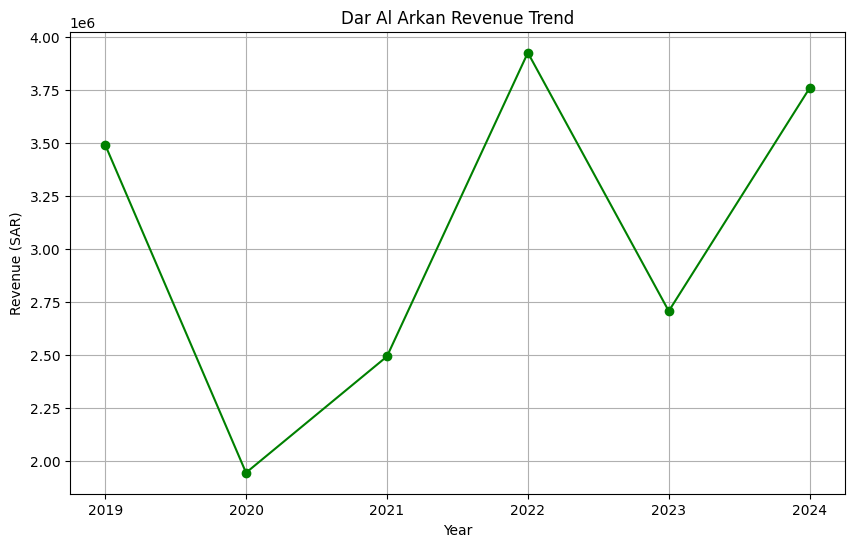

In [9]:
# Visualize Revenue Trend over Years
plt.figure(figsize=(10, 6))
plt.plot(dar_alarkan_new_data["Year"], dar_alarkan_new_data["Revenue_SAR"], marker='o', linestyle='-', color='green')
plt.title("Dar Al Arkan Revenue Trend")
plt.xlabel("Year")
plt.ylabel("Revenue (SAR)")
plt.grid(True)
plt.show()

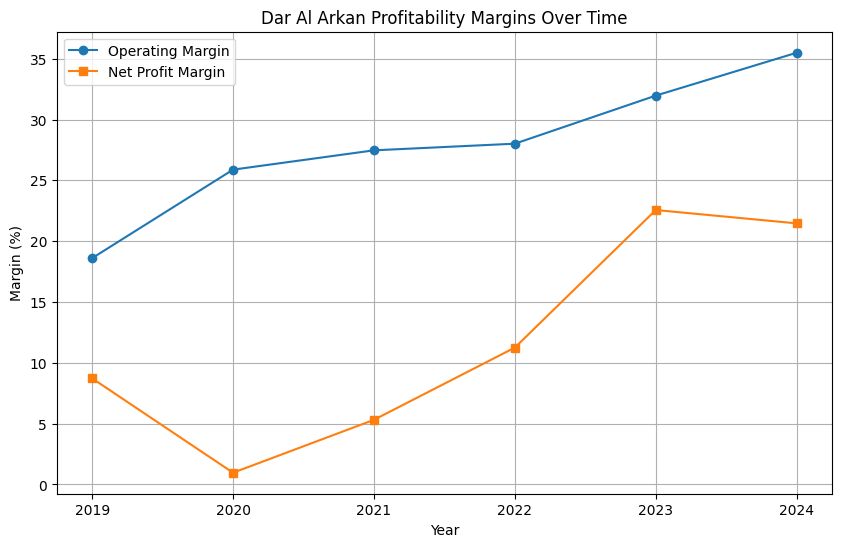

In [10]:
# Visualize Profitability Margins over Years
plt.figure(figsize=(10, 6))
plt.plot(dar_alarkan_new_data["Year"], dar_alarkan_new_data["Operating_Margin_%"], label="Operating Margin", marker='o')
plt.plot(dar_alarkan_new_data["Year"], dar_alarkan_new_data["Net_Profit_Margin_%"], label="Net Profit Margin", marker='s')
plt.legend()
plt.title("Dar Al Arkan Profitability Margins Over Time")
plt.xlabel("Year")
plt.ylabel("Margin (%)")
plt.grid(True)
plt.show()

## Saving Analysis Results

In [11]:
# Save the analysis results to a CSV file
dar_alarkan_new_data.to_csv('dar_alarkan_analysis_results.csv', index=False)
print("Analysis results saved to 'dar_alarkan_analysis_results.csv'")

Analysis results saved to 'dar_alarkan_analysis_results.csv'


## Conclusion

This notebook has provided a comprehensive analysis of Dar Alarkan's financial data, including growth metrics, profitability ratios, financial position, and visualizations. The results have been saved for further use.
